Duffing equation:
$$ m{\ddot  {x}}+c {\dot  {x}}+k x+\alpha x^{3}=\gamma \cos(\omega t)\,$$


# Initial check

(1000,)


<Figure size 432x288 with 0 Axes>

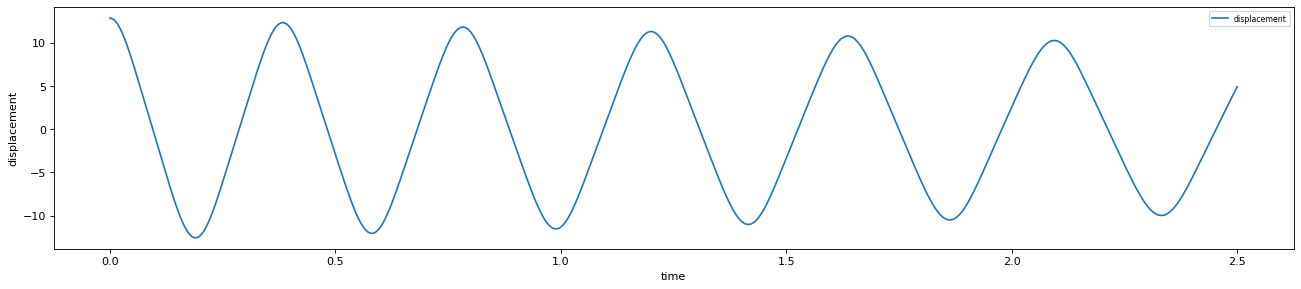

In [ ]:
from scipy.integrate import odeint
import numpy as np
import math
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    delta = 0.321
    alpha = 2.442
    beta = 2.346 
    gamma = 0.105
    omega = 1.208

    # delta = 0.3
    # alpha = -1
    # beta = 1
    # gamma = 0.2
    # omega = 1.2

    x, v = y[0], y[1]
    dx_dt = v
    dv_dt = gamma*(math.cos(omega*t)) - beta*(x*x*x) - alpha*x - delta*v 
    

    return [dx_dt, dv_dt]

# initial condition
y0 = [12.836,0] #[1,0] 

# time points
t = np.linspace(0,2.5,1000)

# solve ODE
y = odeint(model,y0,t)

#x_cor = (t* 1.2) / (2* math.pi)

# plot results
from matplotlib.pyplot import figure
plt.figure()
figure(figsize=(20, 4), dpi=80)
print(y[:,0].shape)
plt.plot(t,y[:,0],label="displacement")
#plt.plot(t,y[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(loc='upper right',fontsize=7)
plt.show()

<Figure size 432x288 with 0 Axes>

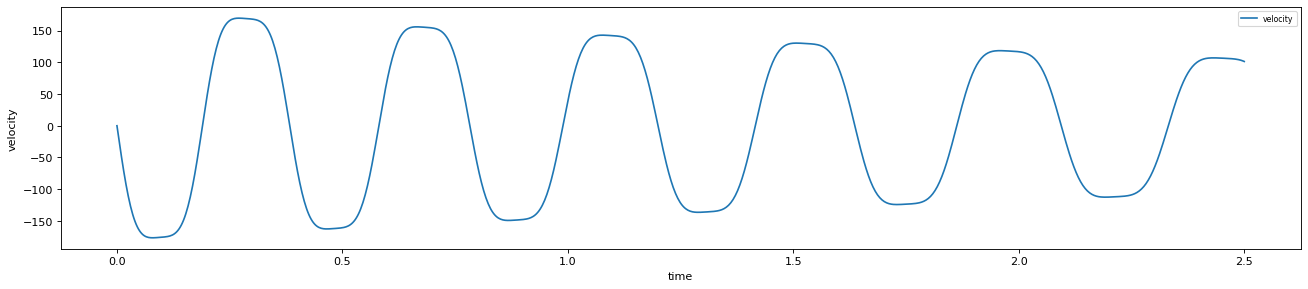

In [ ]:
plt.figure()
figure(figsize=(20, 4), dpi=80)
plt.plot(t,y[:,1],label="velocity")
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(loc='upper right',fontsize=7)
plt.show()

Phase diagram

No handles with labels found to put in legend.


<Figure size 600x400 with 0 Axes>

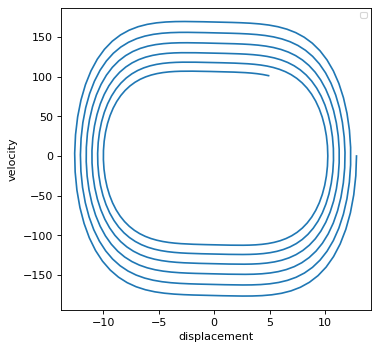

In [ ]:
plt.figure()
figure(figsize=(5, 5), dpi=80)
plt.plot(y[:,0],y[:,1])
plt.xlabel('displacement')
plt.ylabel('velocity')
plt.legend(loc='upper right',fontsize=7)
plt.show()

# Data Generation

In [ ]:
!pip install torchdiffeq

In [ ]:
import numpy as np
import scipy.stats as stats
from torchdiffeq import odeint
from scipy.stats import truncnorm
import torch



def generate_traj(init_x,init_v, m,c,k, alpha, gamma, omega, dt, len_episode):

    def ode_sys(t, X):
        x=torch.Tensor([X[0]])
        dx_dt=torch.Tensor([X[1]])

        # force = 10
        force = gamma* torch.cos(omega*t)
        d2x_dt2=torch.Tensor([(force -alpha*x*x*x -k*x -c*dx_dt)/m])

        return torch.cat([dx_dt, d2x_dt2])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    sol = odeint(ode_sys,torch.cat([init_x,init_v]),t, method = 'euler').numpy()
    
    return t, sol  


def generate_data(rng, n_samples, range_x,range_v, range_m,range_c,range_k,range_alpha, range_gamma, range_omega,
                  dt, len_episode, noise_std,bound_m,bound_c,bound_k,bound_x, bound_v):   


    x_a,x_b = (bound_x[0]-range_x[0])/range_x[1] , (bound_x[1]-range_x[0])/range_x[1]
    v_a,v_b = (bound_v[0]-range_v[0])/range_v[1] , (bound_v[1]-range_v[0])/range_v[1]
    m_a,m_b = (bound_m[0]-range_m[0])/range_m[1] , (bound_m[1]-range_m[0])/range_m[1]
    c_a,c_b = (bound_c[0]-range_c[0])/range_c[1] , (bound_c[1]-range_c[0])/range_c[1]
    k_a,k_b = (bound_k[0]-range_k[0])/range_k[1] , (bound_k[1]-range_k[0])/range_k[1]

    inits_x = torch.Tensor(stats.truncnorm.rvs(x_a,x_b,loc=range_x[0], scale=range_x[1], size=n_samples ))
    inits_v = torch.Tensor(stats.truncnorm.rvs(v_a,v_b,loc=range_v[0], scale=range_v[1], size=n_samples ))
    m = torch.Tensor(stats.truncnorm.rvs(m_a,m_b,loc=range_m[0], scale=range_m[1], size=n_samples ))
    c = torch.Tensor(stats.truncnorm.rvs(c_a,c_b,loc=range_c[0], scale=range_c[1], size=n_samples ))
    k = torch.Tensor(stats.truncnorm.rvs(k_a,k_b,loc=range_k[0], scale=range_k[1], size=n_samples ))
    alphas = torch.Tensor(np.random.normal(loc=range_alpha[0], scale=range_alpha[1], size=n_samples))
    gammas = torch.Tensor(np.random.normal(loc=range_gamma[0], scale=range_gamma[1], size=n_samples))
    omegas = torch.Tensor(np.random.normal(loc=range_omega[0], scale=range_omega[1], size=n_samples))



    # inits_x = torch.Tensor(np.random.normal(loc=range_init_x[0], scale=range_init_x[1], size=n_samples))
    #inits_v = torch.Tensor(np.random.normal(loc=range_init_v[0], scale=range_init_v[1], size=n_samples))
    # m = torch.Tensor(np.random.normal(loc=range_m[0], scale=range_m[1], size=n_samples))
    # c = torch.Tensor(np.random.normal(loc=range_c[0], scale=range_c[1], size=n_samples))
    # k = torch.Tensor(np.random.normal(loc=range_k[0], scale=range_k[1], size=n_samples))
    # alphas = torch.Tensor(np.random.normal(loc=range_alpha[0], scale=range_alpha[1], size=n_samples))
    # gammas = torch.Tensor(np.random.normal(loc=range_gamma[0], scale=range_gamma[1], size=n_samples))
    # omegas = torch.Tensor(np.random.normal(loc=range_omega[0], scale=range_omega[1], size=n_samples))


    

    # solve ODE
    x = np.empty((n_samples, len_episode,2))  
    

    for i in range(n_samples):
          
        t, x_i = generate_traj(inits_x[[i]],inits_v[[i]], m[[i]],c[[i]],k[[i]],alphas[[i]],gammas[[i]],omegas[[i]], dt, len_episode)
        #print(x_i.shape)
        
        x[i,:,:] = x_i
        #print(x.shape)

    # observation noise
    x = x + rng.normal(loc=0.0, scale=noise_std, size=x.shape)

    return t, x, inits_x, inits_v, m,c,k,alphas, gammas,omegas


In [ ]:
# save data
def save_data(name,data):
  np.save('data_{}.npy'.format(name),data)
  print("saved data")

  #np.savetxt('data_{}.txt'.format(name), data)
  

  # save true parameters
  np.savetxt('true_params_{}.txt'.format(name),
      np.stack([inits_x, inits_v,  m,c,k, alphas, gammas, omegas], axis=1), fmt='%.9e',
      header='init_x, init_v , m, c, k, alphas, gammas, omegas')
  print('saved true parameters')


Generate Data with given values

'Len_episode' in real data = 50

'dt' in real data = 0.05

time = 100 * 0.05 = 5 seconds

In [ ]:

# len_episode= 50  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [30,0]
# range_c= [10,2] #[5,0.2]
# range_k= [1000,100]
# range_alpha= [100,0]
# range_gamma=  [5,0]   #[1,0]
# range_omega= [2.5,0] #[2.5,0]
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_c = [4,16]
# bound_k = [700,1300]


In [ ]:

len_episode= 400  # time = len_episode * dt
range_init_x= [0.01,0.002]    
range_init_v=  [0.01,0.002]  
range_m= [50,1.25]
range_c= [20,2] 
range_k= [1000,150]
range_alpha= [100,0]
range_gamma=  [500,0]  
range_omega= [2.5,0] 
bound_x = [0.004,0.016]
bound_v = [0.004,0.016]
bound_m = [46.25,53.75]
bound_c = [14,26]
bound_k = [550,1450]


In [ ]:

dt=0.01
noise_std=0.001
kwargs = {'range_x': range_init_x,'range_v': range_init_v,
          'range_m': range_m,'range_c': range_c,'range_k': range_k,
          'range_alpha': range_alpha, 'range_gamma': range_gamma,
          'range_omega': range_omega,'dt': dt, 'len_episode':len_episode, 'noise_std':noise_std,
          'bound_m':bound_m,'bound_c':bound_c, 'bound_k':bound_k,'bound_x':bound_x,'bound_v':bound_v }


In [ ]:
## function to choose between training,test and validation data

def data_divider(name):
  if name == "train":
    rng_param=1234
    n_samples=100
    return rng_param,n_samples,name

    
  elif name == "valid":
    rng_param=1235
    n_samples=10
    return rng_param,n_samples,name    
    

  # elif name == "test":
  #   rng_param=1236
  #   n_samples=1000
  #   return rng_param,n_samples,name

  # elif name == "test_normal":
  #   rng_param=1236
  #   n_samples=10000
  #   return rng_param,n_samples,name


  # else:
  #   print("invalid input")
  

In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("train")
print(rng_param)
print(n_samples)
print(name)


1234
100
train


In [ ]:
## generating and saving the data  
t, data, inits_x, inits_v, m,c,k, alphas,  gammas, omegas = generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data)

saved data
saved true parameters


In [ ]:
x_o_min = inits_x.min()
x_o_max = inits_x.max()
v_o_min = inits_v.min()
v_o_max = inits_v.max()
m_o_min = m.min()
m_o_max = m.max()
c_o_min = c.min()
c_o_max = c.max()
k_o_min = k.min()
k_o_max = k.max()

In [ ]:

print("m_o_min: ",m_o_min)
print("m_o_max: ",m_o_max)
print("c_o_min: ",c_o_min)
print("c_o_max: ",c_o_max)
print("k_o_min: ",k_o_min)
print("k_o_max: ",k_o_max)

m_o_min:  tensor(46.9753)
m_o_max:  tensor(52.7345)
c_o_min:  tensor(15.0859)
c_o_max:  tensor(25.6052)
k_o_min:  tensor(633.9284)
k_o_max:  tensor(1355.1449)


In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("valid")
print(rng_param)
print(n_samples)
print(name)


1235
10
valid


In [ ]:
## generating and saving the data  
t, data, inits_xv, inits_vv, mv,cv,kv, alphasv, gammasv, omegasv = generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data)

saved data
saved true parameters


In [ ]:
data_train_init = np.load('data_train.npy')
#data_test_init = np.reshape(data_test_init, (1000,100))
# # load ture parameters
# params_test = np.loadtxt('true_params_train.txt')

In [ ]:
data_train_init_dis = data_train_init[:,:,0]

data_train_init_vel = data_train_init[:,:,1]



No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

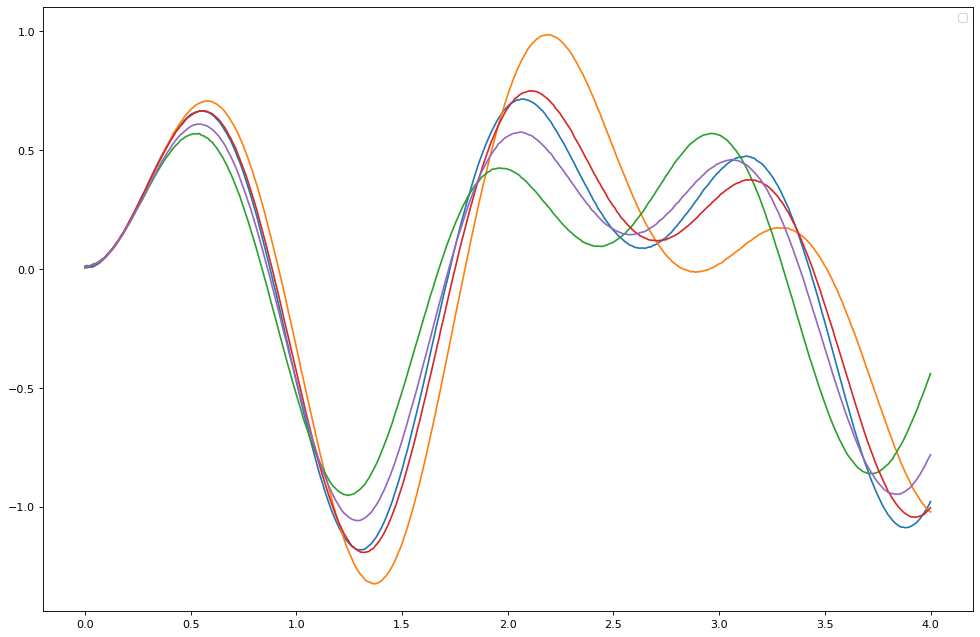

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
t = np.linspace(0.0, 4,400)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)
# for i in range(20):
#     plt.subplot(5,4,i+1)
plt.plot(t,data_train_init_dis[0])
plt.plot(t,data_train_init_dis[10])
plt.plot(t,data_train_init_dis[20])
plt.plot(t,data_train_init_dis[30])
plt.plot(t,data_train_init_dis[48])

#plt.plot(t,data_train_init_vel[idx], 'b',label="velocity")
    
plt.legend(loc='upper right',fontsize=10)
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

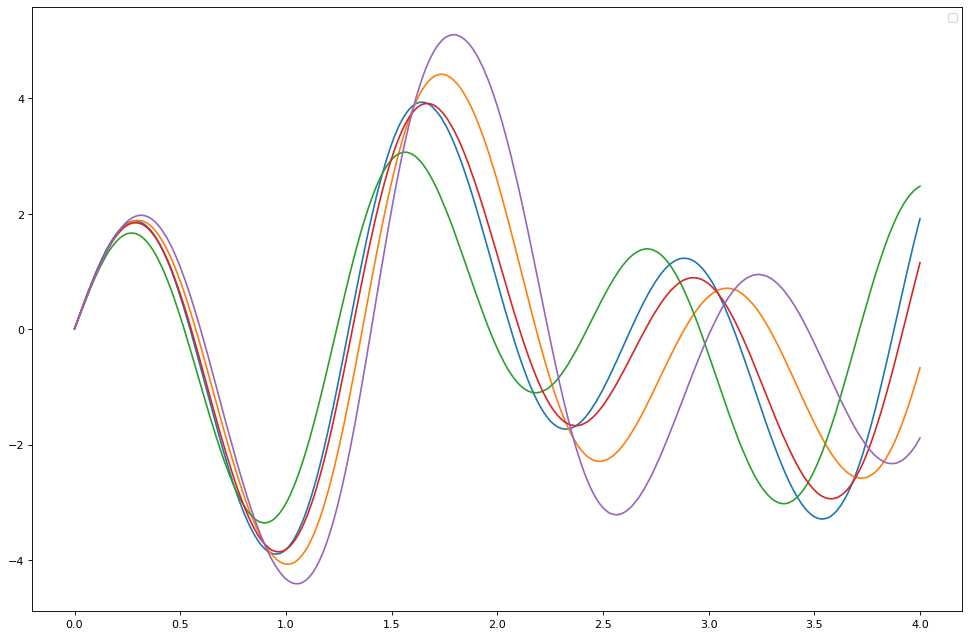

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# t = np.linspace(0.0, 1, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)
# for i in range(20):
#     plt.subplot(5,4,i+1)
plt.plot(t,data_train_init_vel[0])
plt.plot(t,data_train_init_vel[10])
plt.plot(t,data_train_init_vel[20])
plt.plot(t,data_train_init_vel[30])
plt.plot(t,data_train_init_vel[40])

#plt.plot(t,data_train_init_vel[idx], 'b',label="velocity")
    
plt.legend(loc='upper right',fontsize=10)
plt.show()

# Normalizing data

In [ ]:
x_new = (inits_x-x_o_min)/(x_o_max - x_o_min)
v_new = (inits_v-v_o_min)/(v_o_max - v_o_min)
m_new = (m-m_o_min)/(m_o_max - m_o_min)
c_new = (c-c_o_min)/(c_o_max - c_o_min)
k_new = (k-k_o_min)/(k_o_max - k_o_min)


In [ ]:

x_mean = x_new.mean() 
x_std = x_new.std()
v_mean = v_new.mean() 
v_std = v_new.std()
m_mean = m_new.mean() 
m_std = m_new.std()
c_mean = c_new.mean() 
c_std = c_new.std()
k_mean = k_new.mean() 
k_std = k_new.std()

In [ ]:
print("x_mean: ",x_mean)
print("x_std: ",x_std)
print("v_mean: ",v_mean)
print("v_std: ",v_std)
print("m_mean: ",m_mean)
print("m_std: ",m_std)
print("c_mean: ",c_mean)
print("c_std: ",c_std)
print("k_mean: ",k_mean)
print("k_std: ",k_std)

x_mean:  tensor(0.5375)
x_std:  tensor(0.1993)
v_mean:  tensor(0.5279)
v_std:  tensor(0.2397)
m_mean:  tensor(0.4938)
m_std:  tensor(0.2219)
c_mean:  tensor(0.4893)
c_std:  tensor(0.2182)
k_mean:  tensor(0.5061)
k_std:  tensor(0.2043)


In [ ]:
lower_x = x_new.min()
upper_x = x_new.max() 
lower_v = v_new.min()
upper_v = v_new.max() 
lower_m = 1e-6
upper_m = m_new.max() 
lower_c = c_new.min() 
upper_c = c_new.max() 
lower_k = k_new.min() 
upper_k = k_new.max() 

# Helper functions

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def actmodule(activation:str):
    if activation == 'softplus':
        return nn.Softplus()
    elif activation == 'relu':
        return nn.ReLU()
    elif activation == 'leakyrelu':
        return nn.LeakyReLU()
    elif activation == 'prelu':
        return nn.PReLU()
    elif activation == 'elu':
        return nn.ELU()
    elif activation == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError('unknown activation function specified')



def kernel_mat_gauss(sample:torch.Tensor, width:float):
    # https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065/
    #euclidean norm
    norm = (sample**2).sum(1).view(-1, 1)
    #distance matrix
    dist_mat = norm + norm.view(1,-1) - 2.0 * torch.mm(sample, torch.transpose(sample,0,1))
    dist_mat[dist_mat != dist_mat] = 0.0
    # width = torch.max(torch.ones(1,device=sample.device)*1e-4, torch.median(dist_mat).detach())
    return torch.exp(-dist_mat / width)



def hsic(kmat1:torch.Tensor, kmat2:torch.Tensor):
    """
    Unbiased estimator of HSIC [Song+ ICML 2007]
    """
    m = kmat1.shape[0]
    assert m>3
    device = kmat1.device
    K1 = (1.0 - torch.eye(m, device=device)) * kmat1
    K2 = (1.0 - torch.eye(m, device=device)) * kmat2
    return ( torch.sum(K1*K2.T) + torch.sum(K1)*torch.sum(K2)/(m-1)/(m-2) \
            - torch.sum(torch.sum(K1,dim=0)*torch.sum(K2,dim=1))*2/(m-2) ) / m / (m-3)



def mmd(kmat11:torch.Tensor, kmat22:torch.Tensor, kmat12:torch.Tensor):
    """
    Estimator of MMD
    """
    m1 = kmat11.shape[0]
    m2 = kmat22.shape[0]
    return torch.sum(kmat11)/m1/m1 + torch.sum(kmat22)/m2/m2 - 2.0*torch.sum(kmat12)/m1/m2


def nll_normal(data:torch.Tensor, mean:torch.Tensor, lnvar:torch.Tensor):
    """
    Negative log likelihood based on normal observation model, -log N(data | mean1, diag(exp(lnvar)))
    """
    d = data.shape[1]
    if lnvar.ndim==2:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2)/lnvar.exp(), dim=1) + 0.5*torch.sum(lnvar, dim=1)
    else:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2), dim=1)/lnvar.exp() + 0.5*d*lnvar
    return nll



def kldiv_logits_logits(logits1:torch.Tensor, logits2:torch.Tensor):
    """
    KL divergence between categorical distributions represented by sets of logits
    """
    # KL(q(z_phy|x) or p(z_phy) || p(z_phy))
    #   = \sum_i q_i (logit_q_i - logit_p_i) - (lse(logits_q) - lse(logits_p))
    logits1_logsumexp = torch.logsumexp(logits1, dim=1)
    logits2_logsumexp = torch.logsumexp(logits2, dim=1)
    probs1 = torch.exp(logits1 - logits1_logsumexp.unsqueeze(1))
    return torch.sum(probs1 * (logits1-logits2), dim=1) - (logits1_logsumexp-logits2_logsumexp)



def kldiv_normal_normal(mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    KL divergence between normal distributions, KL( N(mean1, diag(exp(lnvar1))) || N(mean2, diag(exp(lnvar2))) )
    """
    if lnvar1.ndim==2 and lnvar2.ndim==2:

        return 0.5 * torch.sum((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1 + (mean2-mean1).pow(2)/lnvar2.exp(), dim=1)
        
    elif lnvar1.ndim==1 and lnvar2.ndim==1:
        d = mean1.shape[1]
        return 0.5 * (d*((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1) + torch.sum((mean2-mean1).pow(2), dim=1)/lnvar2.exp())
    else:
        raise ValueError()



def pdfratio_normal(data:torch.Tensor, mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    Value of ratio of pdfs, N(mean1, diag(exp(lnvar1))) / N(mean2, diag(exp(lnvar2)))
    """
    lnpdf1 = -nll_normal(data, mean1, lnvar1)
    lnpdf2 = -nll_normal(data, mean2, lnvar2)
    return torch.exp(lnpdf1 - lnpdf2)


def draw_normal(mean:torch.Tensor, lnvar:torch.Tensor):
    std = torch.exp(0.5*lnvar)
    eps = torch.randn_like(std) # reparametrization trick
    return mean + eps*std


#for plotting 

def set_default(figsize=(0, 10), dpi=100):    
    plt.rc('axes', facecolor='white')
    plt.rc('figure', facecolor='white')
    plt.rc('figure', figsize=figsize, dpi=dpi)


# MLP

In [ ]:
import torch
import torch.nn as nn

#from . import utils
# import utils


class MLP(nn.Module):
    """Multi-layer perceptron.
    """
    def __init__(self, dims_all:list, activation:str,
                 dropout:float= 0.6, batchnorm:bool=False, actfun_output:bool=False, binary_output:bool=False):
        super(MLP, self).__init__()

        modules = []

        # from first to second-last layer
        for i in range(len(dims_all)-2):
            # fully-connected
            modules.append(nn.Linear(dims_all[i], dims_all[i+1]))
            # batch normalization if any
            if batchnorm:
                modules.append(nn.BatchNorm1d(dims_all[i+1]))
            # nonlinear activation
            modules.append(activation)
            # dropout if any
            if dropout>0.0:
                modules.append(nn.Dropout(p=dropout))

        # last layer
        modules.append(nn.Linear(dims_all[-2], dims_all[-1]))
        if actfun_output:
            modules.append(activation)
        if binary_output:
            modules.append(nn.Sigmoid())

        self.net = nn.Sequential(*modules)
        self.dim_in = dims_all[0]


    def forward(self, x:torch.Tensor):
        out = self.net(x.view(-1, self.dim_in))
        return out


# VAE(displacement)


Priors:
$$ m{\ddot  {x}}+c {\dot  {x}}+k x= 0,$$


In [ ]:
!pip install torchdiffeq

In [ ]:
""" ODE-based physics-augmented VAE model.
"""

import torch
from torch import nn
from torchdiffeq import odeint


class Decoders_dis(nn.Module):
    def __init__(self,config):
        super(Decoders_dis, self).__init__()

        dim_t = config['dim_t']
        dim_z_aux1 = config['dim_z_aux1']
        dim_z_aux2 = config['dim_z_aux2']
        activation = config['activation']
        no_phy = config['no_phy']
        x_lnvar = config['x_lnvar']

        # x_lnvar
        self.register_buffer('param_x_lnvar', torch.ones(1)*x_lnvar)

        if dim_z_aux1 >= 0:
            hidlayers_aux1 = config['hidlayers_aux1_dec']

            # z_aux1, yy (=[y, y_dot]) & t --> time-derivative of y_dot
            self.func_aux1 = MLP([dim_z_aux1+2+1,]+hidlayers_aux1+[1,], activation)

        if dim_z_aux2 >= 0:
            hidlayers_aux2 = config['hidlayers_aux2_dec']
            # z_phy, z_aux2 --> x - y_seq
            dim_z_phy = 0 if no_phy else 5    #(m,c,k,x,v)
            self.func_aux2_res = MLP([dim_z_phy+max(0,dim_z_aux1)+dim_z_aux2,]+hidlayers_aux2+[dim_t,], activation)


class Encoders_dis(nn.Module):
    def __init__(self, config):
        super(Encoders_dis, self).__init__()

        dim_t = config['dim_t']
        dim_z_aux1 = config['dim_z_aux1']
        dim_z_aux2 = config['dim_z_aux2']
        activation = config['activation']
        no_phy = config['no_phy']
        num_units_feat = config['num_units_feat']

        if dim_z_aux1 > 0:
            hidlayers_aux1_enc = config['hidlayers_aux1_enc']

            # x --> feature_aux1
            self.func_feat_aux1 = FeatureExtractor(config)

            # feature_aux1 --> z_aux1
            self.func_z_aux1_mean = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux1,], activation)
            self.func_z_aux1_lnvar = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux1,], activation)


        if dim_z_aux2 > 0:
            hidlayers_aux2_enc = config['hidlayers_aux2_enc']

            # x --> feature_aux2
            self.func_feat_aux2 = FeatureExtractor(config)

            # feature_aux2 --> z_aux2
            self.func_z_aux2_mean = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux2,], activation)
            self.func_z_aux2_lnvar = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux2,], activation)

        if not no_phy:
            hidlayers_unmixer = config['hidlayers_unmixer']
            hidlayers_m = config['hidlayers_m']
            hidlayers_c = config['hidlayers_c']
            hidlayers_k = config['hidlayers_k']
            hidlayers_init_x = config['hidlayers_init_x']
            hidlayers_init_v = config['hidlayers_init_v']

            # x, z_aux1, z_aux2 --> unmixed - x
            self.func_unmixer_res = MLP([dim_t+max(dim_z_aux1,0)+max(dim_z_aux2,0),]+hidlayers_unmixer+[dim_t,], activation)
           
          
            # unmixed --> feature_phy
            self.func_feat_phy = FeatureExtractor(config)

            # features_phy --> m
            self.func_m_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_m+[1,], activation), nn.Softplus())
            self.func_m_lnvar = MLP([num_units_feat,]+hidlayers_m+[1,], activation)

            # features_phy --> c
            self.func_c_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_c+[1,], activation), nn.Softplus())
            self.func_c_lnvar = MLP([num_units_feat,]+hidlayers_c+[1,], activation)

            # features_phy --> k
            self.func_k_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_k+[1,], activation), nn.Softplus())
            self.func_k_lnvar = MLP([num_units_feat,]+hidlayers_k+[1,], activation)


            # features_phy --> init_cond_x
            self.func_x_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_x+[1,], activation), nn.Softplus())
            self.func_x_lnvar = MLP([num_units_feat,]+hidlayers_init_x+[1,], activation)

            
            # features_phy --> init_cond_x
            self.func_v_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_v+[1,], activation), nn.Softplus())
            self.func_v_lnvar = MLP([num_units_feat,]+hidlayers_init_v+[1,], activation)


class FeatureExtractor(nn.Module):
    def __init__(self, config):
        super(FeatureExtractor, self).__init__()

        dim_t = config['dim_t']
        activation = config['activation']
        arch_feat = config['arch_feat']
        num_units_feat = config['num_units_feat']

        self.dim_t = dim_t
        self.arch_feat = arch_feat
        self.num_units_feat = num_units_feat

        if arch_feat=='mlp':
            hidlayers_feat = config['hidlayers_feat']

            self.func= MLP([dim_t,]+hidlayers_feat+[num_units_feat,], activation, actfun_output=True)
        elif arch_feat=='rnn':
            num_rnns_feat = config['num_rnns_feat']

            self.num_rnns_feat = num_rnns_feat
            self.func = nn.GRU(1, num_units_feat, num_layers=num_rnns_feat, bidirectional=False)
        else:
            raise ValueError('unknown feature type')

    def forward(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device = x_.device

        if self.arch_feat=='mlp':
            feat = self.func(x_)
        elif self.arch_feat=='rnn':
            h_0 = torch.zeros(self.num_rnns_feat, n, self.num_units_feat,device = device)
            out, h_n = self.func(x_.T.unsqueeze(2), h_0)
            feat = out[-1]

        return feat



class Physics(nn.Module):
    def __init__(self):
        super(Physics, self).__init__()
   
    def forward(self,m:torch.Tensor,c:torch.Tensor, k:torch.Tensor, t:torch.Tensor, yy:torch.Tensor):
        mdn = m * (m_o_max - m_o_min) + m_o_min
        cdn = c * (c_o_max - c_o_min) + c_o_min
        kdn = k * (k_o_max - k_o_min) + k_o_min
        gamma = config['gamma']
        omega = config['omega']
        force = gamma * torch.cos(omega*t)
        return torch.cat([yy[:,1].reshape(-1,1), ( force -kdn*(yy[:,0].view(-1,1)) - cdn*(yy[:,1].view(-1,1)))/mdn ], dim=1)


class VAE_dis(nn.Module):
    def __init__(self, config):
        super(VAE_dis, self).__init__()        

        self.dim_t = config['dim_t']
        self.dim_z_aux1 = config['dim_z_aux1']
        self.dim_z_aux2 = config['dim_z_aux2']
        self.range_m = config['range_m']
        self.range_c = config['range_c']
        self.range_k = config['range_k']
        self.range_init_x = config['range_init_x']
        self.range_init_v = config['range_init_v']
        self.activation = config['activation']
        self.dt = config['dt']
        self.intg_lev = config['intg_lev']
        self.ode_solver = config['ode_solver']
        self.no_phy = config['no_phy']

        # Decoding part
        self.dec_dis = Decoders_dis(config)

        # Encoding part
        self.enc_dis = Encoders_dis(config)

        # Physics
        self.physics_model = Physics()

        # set time indices for integration
        self.dt_intg = self.dt / float(self.intg_lev)
        self.len_intg = (self.dim_t - 1) * self.intg_lev + 1

        
        self.register_buffer('t_intg', torch.linspace(0.0, self.dt_intg*(self.len_intg-1), self.len_intg))
        

    # def priors(self, n:int, device:torch.device):
    #     prior_c_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_c[0] + self.range_c[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_c[1] - self.range_c[0])) )}
    #     prior_k_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_k[0] + self.range_k[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_k[1] - self.range_k[0])) )}
    #     prior_init_x_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_init_x[0] + self.range_init_x[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_init_x[1] - self.range_init_x[0])) )}
    #     prior_z_aux1_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux1),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux1),device = device)}
    #     prior_z_aux2_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux2),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux2),device = device)}

    #     return prior_c_stat,prior_k_stat,prior_init_x_stat, prior_z_aux1_stat, prior_z_aux2_stat

    def priors(self, n:int, device:torch.device):
        prior_m_stat = {'mean': torch.ones(n,1,device = device) * (self.range_m[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_m[1] ) )}
        prior_c_stat = {'mean': torch.ones(n,1,device = device) * (self.range_c[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_c[1] ) )}
        prior_k_stat = {'mean': torch.ones(n,1,device = device) * (self.range_k[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_k[1] ) )}
        prior_init_x_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_x[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_x[1] ) )}
        prior_init_v_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_v[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_v[1] ) )}

        prior_z_aux1_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux1),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux1),device = device)}
        
        prior_z_aux2_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux2),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux2),device = device)}

        return prior_m_stat, prior_c_stat,prior_k_stat,prior_init_x_stat,prior_init_v_stat, prior_z_aux1_stat,prior_z_aux2_stat


    def generate_physonly(self, m:torch.Tensor,c:torch.Tensor, k:torch.Tensor,x:torch.Tensor,v:torch.Tensor):
        n = c.shape[0]   
        device = c.device     

        # define ODE        
        def ODEfunc(t:torch.Tensor, yy:torch.Tensor):
            return self.physics_model(m,c,k,t, yy)

        # # solve ODE
        # x_1 = []
        # x_2 = []
        # for x in range(n):
        #   x_1.append(torch.tensor([0.001]))
        #   x_2.append(torch.tensor([0.001]))
        # init_x = torch.tensor(x_1,device = device).reshape(n,1)
        # init_v = torch.tensor(x_2,device = device).reshape(n,1)

        xdn = x * (x_o_max - x_o_min) + x_o_min
        vdn = v * (v_o_max - v_o_min) + v_o_min

        initcond = torch.cat([xdn,vdn], dim=1)   
        yy_seq = odeint(ODEfunc, initcond, self.t_intg,method=self.ode_solver)

        return yy_seq



    def decode(self, m:torch.Tensor,c:torch.Tensor, k:torch.Tensor, x:torch.Tensor,v:torch.Tensor,z_aux1:torch.Tensor, z_aux2:torch.Tensor,full:bool=False):
        n = z_aux1.shape[0]
        device = c.device


        # define ODE
        
        def ODEfunc(t:torch.Tensor, _yy:torch.Tensor):
            """Gives gradient of vector _yy, whose shape is <n x 4> or <n x 2>.
            - t should be a scalar
            - _yy should be shape <n x 4> or <n x 2>
            """

            yy_PA = _yy[:, [0,1]]
            if full:
                yy_P = _yy[:, [2,3]]

            if not self.no_phy:
                # physics part (alpha & yy --> time-deriv of yy)
                yy_dot_phy_PA = self.physics_model(m,c,k,t, yy_PA) # Shape(samples, 2)
                #print("yy_dot_phy_PA:", yy_dot_phy_PA.shape)
                if full:
                    yy_dot_phy_P = self.physics_model(m,c,k,t, yy_P)
            else:
                # when model has no physics part *originally*
                yy_dot_phy_PA = torch.zeros(n, 2,device= device)
                if full:
                    yy_dot_phy_P = torch.zeros(n, 2,device= device)

            if self.dim_z_aux1 >= 0:
                # in-ODE auxiliary part (z_aux1, yy & t --> time-deriv of y_dot)
                
                
                print('time:', t)
                print("zaux1:",z_aux1)
                print("yy_PA:",yy_PA)
                yy_dot_aux_PA = torch.cat([torch.zeros(n,1,device= device),
                    self.dec_dis.func_aux1(torch.cat([z_aux1, yy_PA, t.expand(n,1)], dim=1))], dim=1)  # Shape(samples, 2)
                #print("yy_dot_aux_PA:", yy_dot_aux_PA.shape)
            else:
                # when model has no in-ODE auxiliary part *originally*
                yy_dot_aux_PA = torch.zeros(n, 2,device= device)

            if full:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA, yy_dot_phy_P], dim=1)
            else:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA], dim=1)


        # # solve

        if full:
            xdn = x * (x_o_max - x_o_min) + x_o_min
            vdn = v * (v_o_max - v_o_min) + v_o_min
            initcond = torch.cat([xdn, vdn, xdn, vdn], dim=1) # <n x 4>
        else:
            xdn = x * (x_o_max - x_o_min) + x_o_min
            vdn = v * (v_o_max - v_o_min) + v_o_min
            initcond = torch.cat([xdn, vdn], dim=1) # Shape(samples, 2)
            
        print("initcond:", initcond.shape)
        yy_seq = odeint(ODEfunc, initcond,self.t_intg,method=self.ode_solver) # Sahep(400, samples, 2)
        
        yy_seq = yy_seq[range(0, self.len_intg, self.intg_lev)] # subsample to <dim_t x n x 2or4>
        print("yy_seq:", yy_seq.shape)
        # scaling again after ODE solution
        #yy_seq = yy_seq * (data_max - data_min) + data_min

        # extract to <n x dim_t>
        ## here yy_seq is nx4 and 0th and 2nd is dispalcement and 1st and 3rd is velocity 
        y_seq_PA = yy_seq[:,:,0].T

        if full:
            y_seq_P = yy_seq[:,:,2].T

        # out-ODE auxiliary part (y_seq, z_aux2 --> x)
        x_PA = y_seq_PA; x_PAB = x_PA.clone()
        if full:
            x_P = y_seq_P; x_PB = x_P.clone()
        if self.dim_z_aux2 >= 0:
            x_PAB += self.dec_dis.func_aux2_res(torch.cat((m,c,k,x,v ,z_aux1, z_aux2), dim=1))
            if full:
                x_PB += self.dec_dis.func_aux2_res(torch.cat((m,c,k,x,v, z_aux1,z_aux2), dim=1))

        if full:
            return x_PAB, x_PA, x_PB, x_P, self.dec_dis.param_x_lnvar
        else:
            return x_PAB, self.dec_dis.param_x_lnvar


    def encode(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device= x_.device
       
        # infer z_aux1, z_aux2
        if self.dim_z_aux1 > 0:
            feature_aux1 = self.enc_dis.func_feat_aux1(x_)
            z_aux1_stat = {'mean':self.enc_dis.func_z_aux1_mean(feature_aux1), 'lnvar':self.enc_dis.func_z_aux1_lnvar(feature_aux1)}
        else:
            z_aux1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}

        if self.dim_z_aux2 > 0:
            feature_aux2 = self.enc_dis.func_feat_aux2(x_)
            z_aux2_stat = {'mean':self.enc_dis.func_z_aux2_mean(feature_aux2), 'lnvar':self.enc_dis.func_z_aux2_lnvar(feature_aux2)}
        else:
            z_aux2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}

        # infer phy
        if not self.no_phy:
            # # unmixing
            unmixed = x_ + self.enc_dis.func_unmixer_res(torch.cat((x_, z_aux1_stat['mean'], z_aux2_stat['mean']), dim=1))           
            # after unmixing
            feature_phy = self.enc_dis.func_feat_phy(unmixed)


            m_stat = {'mean': self.enc_dis.func_m_mean(feature_phy), 'lnvar': self.enc_dis.func_m_lnvar(feature_phy)}
            c_stat = {'mean': self.enc_dis.func_c_mean(feature_phy), 'lnvar': self.enc_dis.func_c_lnvar(feature_phy)}
            k_stat = {'mean': self.enc_dis.func_k_mean(feature_phy), 'lnvar': self.enc_dis.func_k_lnvar(feature_phy)}
            x_stat = {'mean': self.enc_dis.func_x_mean(feature_phy), 'lnvar': self.enc_dis.func_x_lnvar(feature_phy)}
            v_stat = {'mean': self.enc_dis.func_v_mean(feature_phy), 'lnvar': self.enc_dis.func_v_lnvar(feature_phy)}

        else:
            unmixed = torch.zeros(n, self.dim_t)
            m_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            c_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            k_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            x_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            v_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}

        return m_stat,c_stat, k_stat, x_stat,v_stat,z_aux1_stat, z_aux2_stat, unmixed


    def draw(self, m_stat:dict, c_stat:dict, k_stat:dict,x_stat:dict,v_stat:dict, z_aux1_stat:dict, z_aux2_stat:dict, hard_z:bool=False):
        if not hard_z:
            m = draw_normal(m_stat['mean'], m_stat['lnvar'])
            c = draw_normal(c_stat['mean'], c_stat['lnvar'])
            k = draw_normal(k_stat['mean'], k_stat['lnvar'])
            x = draw_normal(x_stat['mean'], x_stat['lnvar'])
            v = draw_normal(v_stat['mean'], v_stat['lnvar'])
            z_aux1 =draw_normal(z_aux1_stat['mean'], z_aux1_stat['lnvar'])
            z_aux2 =draw_normal(z_aux2_stat['mean'], z_aux2_stat['lnvar'])
        else:
            m = m_stat['mean'].clone()
            c = c_stat['mean'].clone()
            k = k_stat['mean'].clone()
            x = x_stat['mean'].clone()
            v = v_stat['mean'].clone()
            z_aux1 = z_aux1_stat['mean'].clone()
            z_aux2 = z_aux2_stat['mean'].clone()


        # cut infeasible regions
        
        m_feasible_range = [lower_m,upper_m]
        m_n = torch.clamp(m, min=m_feasible_range[0], max=m_feasible_range[1])
        c_feasible_range = [lower_c,upper_c]
        c_n = torch.clamp(c, min=c_feasible_range[0], max=c_feasible_range[1])
        k_feasible_range = [lower_k,upper_k]
        k_n = torch.clamp(k, min=k_feasible_range[0], max=k_feasible_range[1])
        x_feasible_range = [lower_x,upper_x]
        x_n = torch.clamp(x, min=x_feasible_range[0], max=x_feasible_range[1])
        v_feasible_range = [lower_v,upper_v]
        v_n = torch.clamp(v, min=v_feasible_range[0], max=v_feasible_range[1])

        return m_n,c_n, k_n, x_n,v_n,z_aux1, z_aux2



    def forward(self, x:torch.Tensor, reconstruct:bool=True, hard_z:bool=False):
        m_stat,c_stat, k_stat,x_stat,v_stat,  z_aux1_stat, z_aux2_stat, _ = self.encode(x)

        if not reconstruct:
            return m_stat, c_stat, k_stat,x_stat,v_stat, z_aux1_stat, z_aux2_stat

        # draw & reconstruction
        #init_y = x[:,0].clone().view(-1,1)
        m,c, k,x,v, z_aux1, z_aux2 = self.draw(m_stat, c_stat, k_stat, x_stat,v_stat, z_aux1_stat, z_aux2_stat, hard_z=hard_z)
        x_mean, x_lnvar = self.decode( m,c, k,x,v, z_aux1, z_aux2, full=False)

        return m_stat,c_stat, k_stat, x_stat,v_stat, z_aux1_stat, z_aux2_stat, x_mean, x_lnvar

# Displacement training function

In [ ]:

import numpy as np
import torch
from torch import optim




def loss_function_dis(data,m_stat, c_stat, k_stat,x_stat,v_stat,  z_aux1_stat, z_aux2_stat, x_mean):
    n = data.shape[0]
    device= data.device
    

    recerr_sq = torch.sum((x_mean - data).pow(2), dim=1).mean()

    prior_m_stat, prior_c_stat,prior_k_stat,prior_x_stat,prior_v_stat, prior_z_aux1_stat,prior_z_aux2_stat = model_dis.priors(n, device)

    KL_z_aux1 = kldiv_normal_normal(z_aux1_stat['mean'], z_aux1_stat['lnvar'],
        prior_z_aux1_stat['mean'], prior_z_aux1_stat['lnvar']) if config['dim_z_aux1'] > 0 else torch.zeros(1, device= device)
    KL_z_aux2 = kldiv_normal_normal(z_aux2_stat['mean'], z_aux2_stat['lnvar'],
        prior_z_aux2_stat['mean'], prior_z_aux2_stat['lnvar']) if config['dim_z_aux2'] > 0 else torch.zeros(1, device= device)
    KL_m = kldiv_normal_normal(m_stat['mean'], m_stat['lnvar'],
        prior_m_stat['mean'], prior_m_stat['lnvar']) if not config['no_phy'] else torch.zeros(1, device= device)
    KL_c = kldiv_normal_normal(c_stat['mean'], c_stat['lnvar'],
        prior_c_stat['mean'], prior_c_stat['lnvar']) if not config['no_phy'] else torch.zeros(1, device= device)
    KL_k = kldiv_normal_normal(k_stat['mean'], k_stat['lnvar'],
        prior_k_stat['mean'], prior_k_stat['lnvar']) if not config['no_phy'] else torch.zeros(1, device= device)
    KL_x = kldiv_normal_normal(x_stat['mean'], x_stat['lnvar'],
        prior_x_stat['mean'], prior_x_stat['lnvar']) if not config['no_phy'] else torch.zeros(1, device= device)
    KL_v = kldiv_normal_normal(v_stat['mean'], v_stat['lnvar'],
        prior_v_stat['mean'], prior_v_stat['lnvar']) if not config['no_phy'] else torch.zeros(1, device= device)


    kldiv = (KL_z_aux1 + KL_z_aux2 +KL_m+ KL_c+ KL_k +KL_x+ KL_v ).mean()

    return recerr_sq, KL_z_aux1.mean(),KL_z_aux2.mean(),KL_m.mean(),KL_c.mean(),KL_k.mean(),KL_x.mean(), KL_v.mean(),kldiv


def train_dis(epoch, device, loader, model, optimizer):

    model.train()
    logs = {'recerr_sq':.0, 'KL_z_aux1':.0, 'KL_z_aux2':.0,'KL_m':.0,'KL_c':.0, 'KL_c':.0,'KL_k':.0,'KL_x':.0 ,'KL_v':.0 }

    for batch_idx, (data,) in enumerate(loader):
        
        data= data.to(device)
        batch_size = len(data)
        optimizer.zero_grad()

        # inference & reconstruction on original data
        m_stat,c_stat, k_stat, x_stat,v_stat, z_aux1_stat, z_aux2_stat, _ = model.encode(data)
        m,c, k,x,v, z_aux1, z_aux2  = model.draw(m_stat,c_stat, k_stat,x_stat,v_stat,  z_aux1_stat, z_aux2_stat, hard_z=False)
        #init_y = data[:,0].clone().view(-1,1)
        x_PAB, x_lnvar = model.decode(m,c, k,x,v, z_aux1, z_aux2, full=False)
        x_var = torch.exp(x_lnvar)
        

        # ELBO
        recerr_sq, KL_z_aux1, KL_z_aux2, KL_m,KL_c,KL_k,KL_x,KL_v,kldiv = loss_function_dis(data,m_stat,c_stat, k_stat, x_stat,v_stat, z_aux1_stat, z_aux2_stat, x_PAB)

      
        # loss function
        loss = recerr_sq + kldiv

        
        # update model parameters
        loss.backward()
        if config['grad_clip']>0.0:
            torch.nn.utils.clip_grad_value_(model.parameters(), config['grad_clip'])
        optimizer.step()

        # log
        logs['recerr_sq'] += recerr_sq.detach()*batch_size
        logs['KL_z_aux1'] += KL_z_aux1.detach()*batch_size
        logs['KL_z_aux2'] += KL_z_aux2.detach()*batch_size
        logs['KL_m'] += KL_m.detach()*batch_size
        logs['KL_c'] += KL_c.detach()*batch_size
        logs['KL_k'] += KL_k.detach()*batch_size
        logs['KL_x'] += KL_x.detach()*batch_size
        logs['KL_v'] += KL_v.detach()*batch_size


    for key in logs:

        logs[key] /= len(loader.dataset)
    print('====> Epoch: {}  Training (rec. err.)^2: {:.4f}  KL_z_aux1: {} KL_z_aux2: {} KL_m: {} KL_c: {} KL_k: {} KL_x: {} KL_v: {}  '.format(
        epoch,  logs['recerr_sq'], logs['KL_z_aux1'], logs['KL_z_aux2'], logs['KL_m'], logs['KL_c'], logs['KL_k'], logs['KL_x'], logs['KL_v']))
    return logs


def valid_dis(epoch,device, loader, model):
    model.eval()
    logs = {'recerr_sq':.0, 'KL_z_aux1':.0, 'KL_z_aux2':.0, 'KL_m':.0, 'KL_c':.0,'KL_k':.0, 'KL_x':.0,'KL_v':.0 }
    with torch.no_grad():
        for i, (data,) in enumerate(loader):
            
            data = data.to(device)
            batch_size = len(data)
            m_stat,c_stat, k_stat,x_stat, v_stat, z_aux1_stat, z_aux2_stat, x_mean, x_lnvar = model(data)
            recerr_sq, KL_z_aux1, KL_z_aux2, KL_m, KL_c,KL_k,KL_x,KL_v,kldiv = loss_function_dis(data, m_stat, c_stat, k_stat, x_stat, v_stat, z_aux1_stat, z_aux2_stat, x_mean)


           # log
            logs['recerr_sq'] += recerr_sq.detach()*batch_size
            logs['KL_z_aux1'] += KL_z_aux1.detach()*batch_size
            logs['KL_z_aux2'] += KL_z_aux2.detach()*batch_size
            logs['KL_m'] += KL_m.detach()*batch_size
            logs['KL_c'] += KL_c.detach()*batch_size
            logs['KL_k'] += KL_k.detach()*batch_size
            logs['KL_x'] += KL_x.detach()*batch_size
            logs['KL_v'] += KL_v.detach()*batch_size

        for key in logs:

            logs[key] /= len(loader.dataset)
        print('====> Epoch: {}  Validation (rec. err.)^2: {:.4f}  KL_z_aux1: {} KL_z_aux2: {} KL_m: {} KL_c: {} KL_k: {} KL_x: {} KL_v: {}  '.format(
            epoch,  logs['recerr_sq'], logs['KL_z_aux1'], logs['KL_z_aux2'], logs['KL_m'], logs['KL_c'], logs['KL_k'], logs['KL_x'], logs['KL_v']))
        return logs



# Configuration

In [ ]:

# len_episode= 400  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [50,1.25]
# range_c= [20,2] 
# range_k= [1000,150]
# range_alpha= [100,0]
# range_gamma=  [500,0]  
# range_omega= [2.5,0] 
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_m = [46.25,53.75]
# bound_c = [14,26]
# bound_k = [550,1450]


In [ ]:
import numpy as np
config={
    'dim_t':400, #50,
    # prior knowledge

    'range_init_x':[x_mean,x_std],
    'range_init_v':[v_mean,v_std], 
    'range_m':[m_mean,m_std],
    'range_c':[c_mean,c_std],   
    'range_k':[k_mean,k_std],
    'gamma': 500, 
    'omega' : 2.5,
    'alpha' : 100,

    
    #model(general)
    'dim_z_aux1' : 10,
    'dim_z_aux2' : 10,
    # 'dim_z_aux3' : 1,
    # 'dim_z_aux4' : 1,

    'intg_lev' : 1,
    'dt':0.01,
    'no_phy' : False,
    'ode_solver' : 'euler',
    'activation' : actmodule('elu'),
    
    # model (decoder)
    'x_lnvar' : -9.0,
    'hidlayers_aux1_dec' :[164,164],
    'hidlayers_aux2_dec' :[164,164],

    # model (encoder)
    'hidlayers_aux1_enc' : [164,164],
    'hidlayers_aux2_enc' : [164,164],
    'hidlayers_unmixer' :[164,164],

    'hidlayers_m' : [164,164],
    'hidlayers_c' : [164,164],
    'hidlayers_k' : [164,164],
    'hidlayers_init_x' : [164,164],
    'hidlayers_init_v' : [164,164],


    'arch_feat' : 'mlp',
    'num_units_feat' : 264,
    'hidlayers_feat' : [164,164],
    'num_rnns_feat' : 1,

    # optimization (base)
    'learning_rate' : 1e-3,
    'weight_decay' : 1e-2,
    'adam_eps' : 1e-2,
    'grad_clip' : 5,
    'batch_size' : 1,
    'epochs' : 1,

    # others
    'train_size' : 1,
    'save_interval' : 999999,
    'num_workers' : 0,
    'cuda': False,
    'seed' : 3407

}

# Load data

In [ ]:
# load training/validation data

data_train_1 = np.load('data_train.npy')

data_train_dis = data_train_1[:,:,0]
# data_min = data_train_dis1.min()
# data_max = data_train_dis1.max()

In [ ]:
# data_train_dis = (data_train_dis1 -data_min)/(data_max - data_min)


In [ ]:
data_valid_1 = np.load('data_valid.npy')
data_valid_dis = data_valid_1[:,:,0]


In [ ]:
# data_valid_dis = (data_valid_dis1 - data_valid_dis1.min())/ (data_valid_dis1.max() -data_valid_dis1.min())

In [ ]:
cuda = config['cuda'] and torch.cuda.is_available()
device = torch.device("cuda" if config['cuda'] else "cpu")
device

device(type='cpu')

# Train dis. model

In [ ]:
# set random seed
torch.manual_seed(config['seed'])
#dim_t = data_train.shape[1]
dim_t = config['dim_t']
dt = config['dt']


if  config['train_size'] > 0:
    if  config['train_size'] > data_train_dis.shape[0]:
        raise ValueError('train_size must be <= {}'.format(data_train_dis.shape[0]))
    idx = torch.randperm(data_train_dis.shape[0]).numpy()[0: config['train_size']]
    data_train_dis = data_train_dis[idx]


# set data loaders
kwargs = {'num_workers': config['num_workers'], 'pin_memory': True} if config['cuda'] else {}
loader_train_dis = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_train_dis).float()),
    batch_size= config['batch_size'], shuffle=True, **kwargs)
loader_valid_dis = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_valid_dis).float()),
    batch_size=config['batch_size'], shuffle=False, **kwargs)


# set model
model_dis = VAE_dis(config).to(device)



# set optimizer
kwargs = {'lr': config['learning_rate'], 'weight_decay': config['weight_decay'], 'eps': config['adam_eps']}
optimizer_dis = optim.Adam(model_dis.parameters(), **kwargs)



print(vars())
print()



# main iteration
info = {'bestvalid_epoch':0, 'bestvalid_recerr':1}
dur_total = .0

# displacement 
kldiv_train_dis=[]
kldiv_valid_dis=[]
recerr_sq_loss_train_dis=[]
recerr_sq_loss_valid_dis=[]
total_loss_dis=[]
kldiv_balanced_loss_dis=[]

for epoch in range(1, config['epochs'] + 1):
    # training
 
    # displacement training
    logs_train_dis = train_dis(epoch, device, loader_train_dis, model=model_dis, optimizer=optimizer_dis)
    #logs_valid_dis = valid_dis(epoch, device, loader_valid_dis, model_dis)
    # # displacemnet logs
    # kldiv_train_dis.append(logs_train_dis['kldiv_train'])
    # kldiv_valid_dis.append(logs_valid_dis['kldiv_valid'])
    # recerr_sq_loss_train_dis.append(logs_train_dis['recerr_sq'])
    # recerr_sq_loss_valid_dis.append(logs_valid_dis['recerr_sq'])
    # total_loss_dis.append(logs_train_dis['total_loss'])

  

print()
print('end training')

##saving model
torch.save(model_dis.state_dict(),'best model_dis.pt')
print('best model saved')

Streaming output truncated to the last 5000 lines.
        (0): Linear(in_features=264, out_features=164, bias=True)
        (1): ELU(alpha=1.0)
        (2): Dropout(p=0.6, inplace=False)
        (3): Linear(in_features=164, out_features=164, bias=True)
        (4): ELU(alpha=1.0)
        (5): Dropout(p=0.6, inplace=False)
        (6): Linear(in_features=164, out_features=1, bias=True)
      )
    )
    (func_x_mean): Sequential(
      (0): MLP(
        (net): Sequential(
          (0): Linear(in_features=264, out_features=164, bias=True)
          (1): ELU(alpha=1.0)
          (2): Dropout(p=0.6, inplace=False)
          (3): Linear(in_features=164, out_features=164, bias=True)
          (4): ELU(alpha=1.0)
          (5): Dropout(p=0.6, inplace=False)
          (6): Linear(in_features=164, out_features=1, bias=True)
        )
      )
      (1): Softplus(beta=1, threshold=20)
    )
    (func_x_lnvar): MLP(
      (net): Sequential(
        (0): Linear(in_features=264, out_features=164, 

KeyboardInterrupt: ignored

# Postprocessing New


In [ ]:
# load displacement model
model_dis = VAE_dis(config)
model_dis.load_state_dict(torch.load('best model_dis.pt'))
model_dis.eval()
print('model loaded')

model loaded


In [ ]:
# # load velocity model
# model_vel = VAE_vel(config)
# model_vel.load_state_dict(torch.load('best model_vel.pt'))
# model_vel.eval()
# print('model loaded')

In [ ]:
data_tensor = torch.Tensor(data_train_dis)

In [ ]:
m_stat,c_stat,k_stat,x_stat,v_stat, z_aux1_stat, z_aux2_stat, _= model_dis.encode(data_tensor)
m,c, k,x,v, z_aux1, z_aux2 = model_dis.draw(m_stat,c_stat, k_stat,x_stat,v_stat,  z_aux1_stat, z_aux2_stat, hard_z=False)
prior_m_stat,prior_c_stat,prior_k_stat,prior_x_stat,prior_v_stat, prior_z_aux1_stat, prior_z_aux2_stat = model_dis.priors(5000, device)
prior_m,prior_c, prior_k,prior_x,prior_v, prior_z_aux1, prior_z_aux2 = model_dis.draw(prior_m_stat,prior_c_stat,prior_k_stat,prior_x_stat,prior_v_stat, prior_z_aux1_stat, prior_z_aux2_stat, hard_z=False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


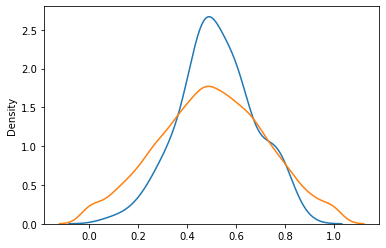

In [ ]:

import seaborn as sns
sns.distplot(a=m.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_m.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


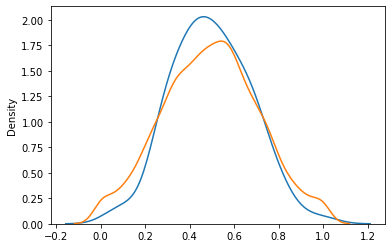

In [ ]:

import seaborn as sns
sns.distplot(a=c.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_c.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


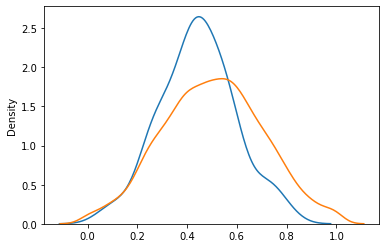

In [ ]:
sns.distplot(a=k.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_k.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


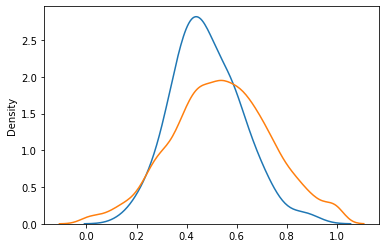

In [ ]:
sns.distplot(a=x.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_x.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


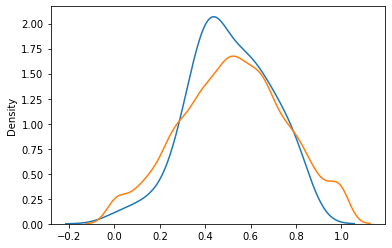

In [ ]:
sns.distplot(a=v.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_v.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


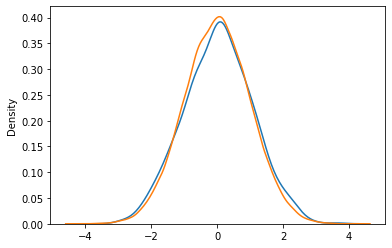

In [ ]:
sns.distplot(a=z_aux1.detach().numpy(),hist=False, kde=True,bins=10)
sns.distplot(a=prior_z_aux1.cpu().detach().numpy(),hist=False, kde=True,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


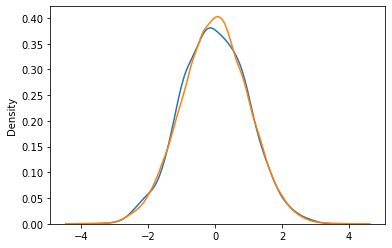

In [ ]:
sns.distplot(a=z_aux2.detach().numpy(), hist=False,kde=True,bins=10)
sns.distplot(a=prior_z_aux2.cpu().detach().numpy(),hist=False, kde=True,bins=10)

In [ ]:

# len_episode= 400  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [50,1.25]
# range_c= [20,2] 
# range_k= [1000,150]
# range_alpha= [100,0]
# range_gamma=  [500,0]  
# range_omega= [2.5,0] 
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_m = [46.25,53.75]
# bound_c = [14,26]
# bound_k = [550,1450]


In [ ]:
range_pm= [50,1.25]  
range_pc= [20,2] 
range_pk= [1000,150]
range_px= [0.01,0.002]
range_pv= [0.01,0.002]
bound_pm = [46.25,53.75]
bound_pc = [14,26]
bound_pk = [550,1450]
bound_px = [0.004,0.016]
bound_pv = [0.004,0.016]
pn_samples=(5000,1)
pv_samples = (5000,10)

In [ ]:
pm_a,pm_b = (bound_pm[0]-range_pm[0])/range_pm[1] , (bound_pm[1]-range_pm[0])/range_pm[1]
pc_a,pc_b = (bound_pc[0]-range_pc[0])/range_pc[1] , (bound_pc[1]-range_pc[0])/range_pc[1]
pk_a,pk_b = (bound_pk[0]-range_pk[0])/range_pk[1] , (bound_pk[1]-range_pk[0])/range_pk[1]
px_a,px_b = (bound_px[0]-range_px[0])/range_px[1] , (bound_px[1]-range_px[0])/range_px[1]
pv_a,pv_b = (bound_pv[0]-range_pv[0])/range_pv[1] , (bound_pv[1]-range_pv[0])/range_pv[1]

In [ ]:
m_vec =  torch.Tensor(stats.truncnorm.rvs(pm_a,pm_b,loc=range_pm[0], scale=range_pm[1], size=pn_samples ))
c_vec =  torch.Tensor(stats.truncnorm.rvs(pc_a,pc_b,loc=range_pc[0], scale=range_pc[1], size=pn_samples ))
k_vec =  torch.Tensor(stats.truncnorm.rvs(pk_a,pk_b,loc=range_pk[0], scale=range_pk[1], size=pn_samples ))
x_vec =  torch.Tensor(stats.truncnorm.rvs(px_a,px_b,loc=range_px[0], scale=range_px[1], size=pn_samples ))
v_vec =  torch.Tensor(stats.truncnorm.rvs(pv_a,pv_b,loc=range_pv[0], scale=range_pv[1], size=pn_samples ))
z_aux1 = torch.normal(mean=0, std=1, size=pv_samples)
z_aux2 = torch.normal(mean=0, std=1, size=pv_samples)

In [ ]:
# pn_samples = (500,1)
# pv_samples = (500,10)


In [ ]:

# len_episode= 400  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [50,1.25]
# range_c= [20,2] 
# range_k= [1000,150]
# range_alpha= [100,0]
# range_gamma=  [500,0]  
# range_omega= [2.5,0] 
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_m = [46.25,53.75]
# bound_c = [14,26]
# bound_k = [550,1450]


Original

In [ ]:
# m_vec = torch.normal(mean=50, std=1.25, size=pn_samples)
# c_vec = torch.normal(mean=20, std=2, size=pn_samples)
# k_vec = torch.normal(mean=1000, std=150,  size=pn_samples)
# x_vec = torch.normal(mean=0.01, std=0.002, size=pn_samples)
# v_vec = torch.normal(mean=0.01, std=0.002,  size=pn_samples)
# z_aux1 = torch.normal(mean=0, std=1, size=pv_samples)
# z_aux2 = torch.normal(mean=0, std=1, size=pv_samples)
# # z_aux3 = torch.normal(mean=0, std=1, size=(500, 5))
# # z_aux4 = torch.normal(mean=0, std=1, size=(500, 5))

In [ ]:
#scaling
m_vecs = (m_vec - m_o_min)/(m_o_max - m_o_min)
c_vecs = (c_vec - c_o_min)/(c_o_max - c_o_min)
k_vecs = (k_vec - k_o_min)/(k_o_max - k_o_min)
x_vecs = (x_vec - x_o_min)/(x_o_max - x_o_min)
v_vecs = (v_vec - v_o_min)/(v_o_max - v_o_min)

In [ ]:
# #scaling
# m_vecs = (m_vec -m_vec.min())/  (m_vec.max() - m_vec.min())
# c_vecs = (c_vec -c_vec.min())/  (c_vec.max() - c_vec.min())
# k_vecs = (k_vec -k_vec.min())/  (k_vec.max() - k_vec.min())
# x_vecs = (x_vec -x_vec.min())/  (x_vec.max() - x_vec.min())
# v_vecs = (v_vec -v_vec.min())/  (v_vec.max() - v_vec.min())

In [ ]:
%%time
# generate displacement from learned model
from torchdiffeq import odeint
with torch.no_grad():
    cf_x = []
    cf_x, _ = model_dis.decode(m_vecs,c_vecs, k_vecs,x_vecs,v_vecs, z_aux1,z_aux2)
    cf_x = cf_x.numpy()
    cfx_phy_only = model_dis.generate_physonly(m_vecs,c_vecs, k_vecs,x_vecs,v_vecs)
    cfx_phy_only = cfx_phy_only.numpy()
  

Streaming output truncated to the last 5000 lines.
        [ 0.4745, -1.4993],
        [ 0.4915, -1.5339]])
time: tensor(0.6600)
zaux1: tensor([[-0.8624, -0.7894,  2.4050,  ...,  0.9416, -0.6208,  0.3821],
        [ 1.4521, -0.6398,  0.0734,  ..., -1.6712,  1.1938, -0.0242],
        [ 1.4052, -0.6393, -0.6061,  ..., -1.5814,  1.0374, -1.3577],
        ...,
        [-0.5460,  0.6527, -0.6131,  ..., -2.6526,  0.9269, -0.4517],
        [ 0.5830, -1.1080, -0.8424,  ...,  1.6629, -0.5991,  2.0455],
        [ 0.1779,  0.7565, -0.5220,  ...,  1.5589, -0.4485, -1.1478]])
yy_PA: tensor([[ 0.4451, -1.5198],
        [ 0.4519, -1.5751],
        [ 0.4618, -1.5327],
        ...,
        [ 0.4313, -1.5678],
        [ 0.4595, -1.6138],
        [ 0.4762, -1.6518]])
time: tensor(0.6700)
zaux1: tensor([[-0.8624, -0.7894,  2.4050,  ...,  0.9416, -0.6208,  0.3821],
        [ 1.4521, -0.6398,  0.0734,  ..., -1.6712,  1.1938, -0.0242],
        [ 1.4052, -0.6393, -0.6061,  ..., -1.5814,  1.0374, -1.3577],
   

Saving Predicted displacement and params used

In [ ]:
# save data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")

  #np.savetxt('data_{}.txt'.format(name), data)
  

  # # save true parameters
  # np.save('true_params_{}.npy'.format(name),
  #     np.stack([m_vec, c_vec, k_vec, x_vec, v_vec ], axis=1),
  #     header='m_vec, c_vec, k_vec, x_vec, v_vec')
  # print('saved true parameters')

    # save true parameters
  
  np.savetxt('true_params_{}.txt'.format('m_vec'),m_vec)
  np.savetxt('true_params_{}.txt'.format('c_vec'),c_vec)
  np.savetxt('true_params_{}.txt'.format('k_vec'),k_vec)
  np.savetxt('true_params_{}.txt'.format('x_vec'),x_vec)
  np.savetxt('true_params_{}.txt'.format('v_vec'),v_vec)
  print('saved true parameters')

In [ ]:
save_data('pred', cf_x)

saved data
saved true parameters


**Denormalizing**

In [ ]:
# cf_x = cf_x * (data_max - data_min) +  data_min

In [ ]:
# cfx_phy_only = cfx_phy_only * (data_max - data_min) +  data_min

In [ ]:
# generate velocity from learned model
# from torchdiffeq import odeint


# with torch.no_grad():
#     cf_v = []
    
#     cf_v, _ = model_vel.decode(c_vec, k_vec, z_aux3, z_aux4, init_x_vec,init_v_vec)
#     cf_v = cf_v.numpy()
#     cfv_phy_only = model_vel.generate_physonly(c_vec, k_vec,init_x_vec,init_v_vec)
#     cfv_phy_only = cfv_phy_only.numpy()

  

In [ ]:
from torchdiffeq import odeint
import torch

def generate_traj_true(init_x,init_v, m,c,k, alpha, gamma, omega, dt, len_episode):

    def ode_sys(t, X):
        x=torch.Tensor([X[0]])
        dx_dt=torch.Tensor([X[1]])


        force = gamma* torch.cos(omega*t)
        d2x_dt2=torch.Tensor([(force -alpha*x*x*x -k*x -c*dx_dt)/m])

        return torch.cat([dx_dt, d2x_dt2])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    sol = odeint(ode_sys,torch.cat([init_x,init_v]),t, method = 'euler').numpy()
    
    return t, sol  


In [ ]:
# m_vecdn = m_vec * (m_o_max - m_o_min) +  m_o_min
# c_vecdn = c_vec * (c_o_max - c_o_min) +  c_o_min
# k_vecdn = k_vec * (k_o_max - k_o_min) +  k_o_min
# x_vecdn = x_vec * (x_o_max - x_o_min) +  x_o_min
# v_vecdn = v_vec * (v_o_max - v_o_min) +  v_o_min

In [ ]:
%%time
n = 5000
dim_t = config['dim_t']
cf_x_true_dis = np.empty((n, dim_t)) 
cf_x_true_vel = np.empty((n, dim_t))
dt = config['dt']

for i in range(n):


    alpha = config['alpha']
    gamma = config['gamma']
    omega = config['omega']

    
    t, tmp = generate_traj_true(x_vec[i] ,x_vec[i],m_vec[i],c_vec[i], k_vec[i],alpha, gamma, omega, dt, dim_t) 

    cf_x_true_dis[i] = tmp[:,0]
    cf_x_true_vel[i] = tmp[:,1]

CPU times: user 3min 16s, sys: 345 ms, total: 3min 17s
Wall time: 3min 17s


In [ ]:
# save true data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")



In [ ]:
save_data("true",cf_x_true_dis )

saved data


# Displacement prediction

<Figure size 432x288 with 0 Axes>

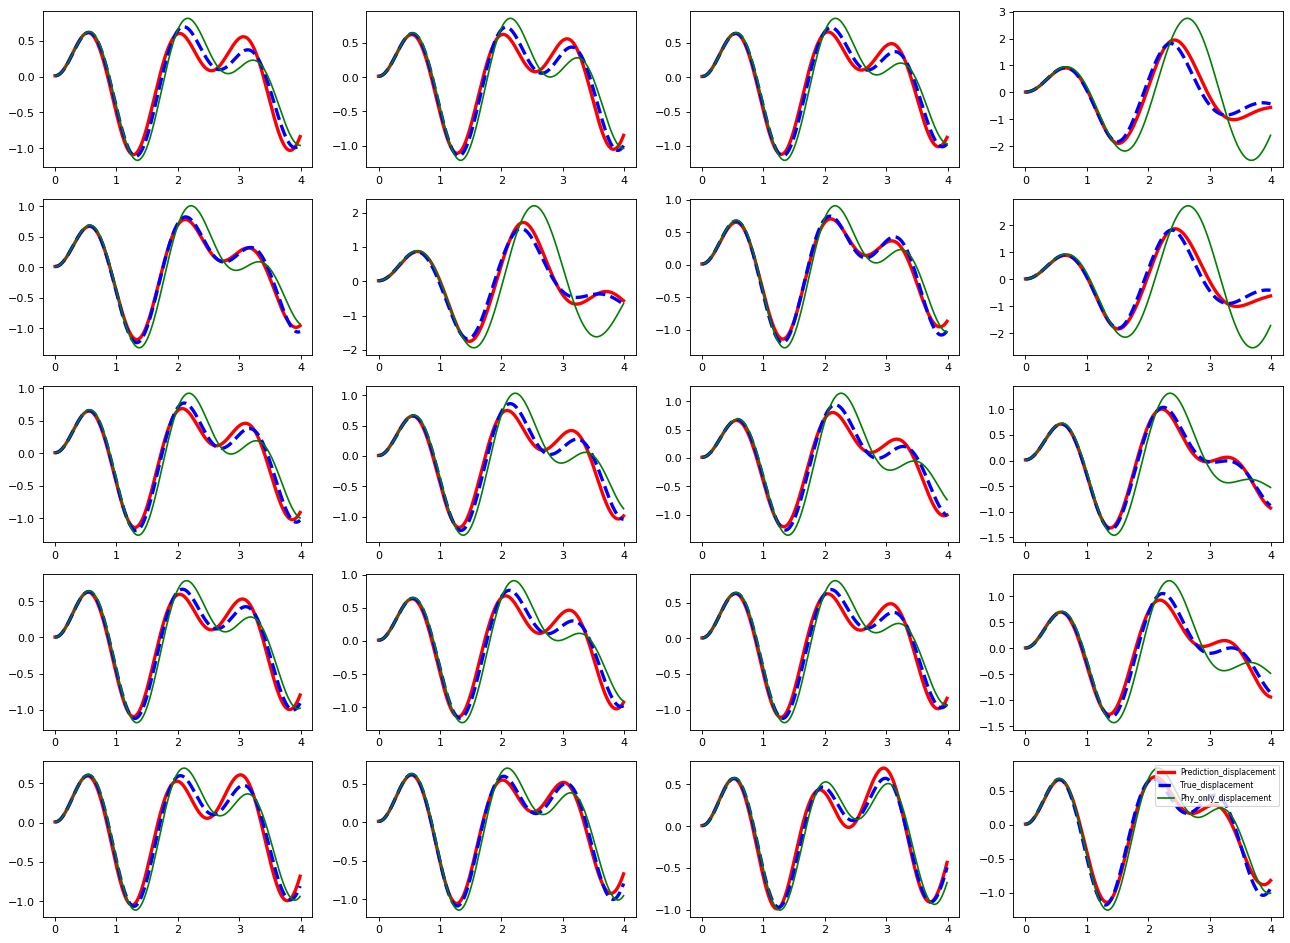

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(20, 15), dpi=80)

for i in range(20):
    # print(cf_z_phy[i][idx].item())
    plt.subplot(5,4,i+1)
    
    plt.plot(t,cf_x[i,:], 'r',linewidth=3,label="Prediction_displacement")
    plt.plot(t,cf_x_true_dis[i,:], 'b',linestyle='dashed',linewidth=3,label="True_displacement")
    plt.plot(t,cfx_phy_only[:,i,0], 'g',label="Phy_only_displacement")


    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=7)
plt.show()

In [ ]:
# calculate mean of n displacement:
# pred
cf_x_mean = []
cf_x_T = cf_x.T
for x in cf_x_T:
   #print(x.shape)
    cf_x_mean.append(x.mean())

# true
cf_x_true_dis_mean =[]
cf_x_true_dis_T = cf_x_true_dis.T
for y in cf_x_true_dis_T:
   #print(x.shape)
    cf_x_true_dis_mean.append(y.mean())

# phy only
cf_x_phy_dis_mean =[]
for z in cfx_phy_only[:,:,0]:
   #print(x.shape)
    cf_x_phy_dis_mean.append(z.mean())

In [ ]:
# calculate std of n displacement

#pred
cf_x_std = []
cf_x_T = cf_x.T
for x in cf_x_T:
   #print(x.shape)
    cf_x_std.append(x.var())

#true
cf_x_true_dis_std =[]
cf_x_true_dis_T = cf_x_true_dis.T
for y in cf_x_true_dis_T:
   #print(x.shape)
    cf_x_true_dis_std.append(y.var())

# phy only
cf_x_phy_dis_std =[]
for z in cfx_phy_only[:,:,0]:
   #print(x.shape)
    cf_x_phy_dis_std.append(z.var())


<Figure size 432x288 with 0 Axes>

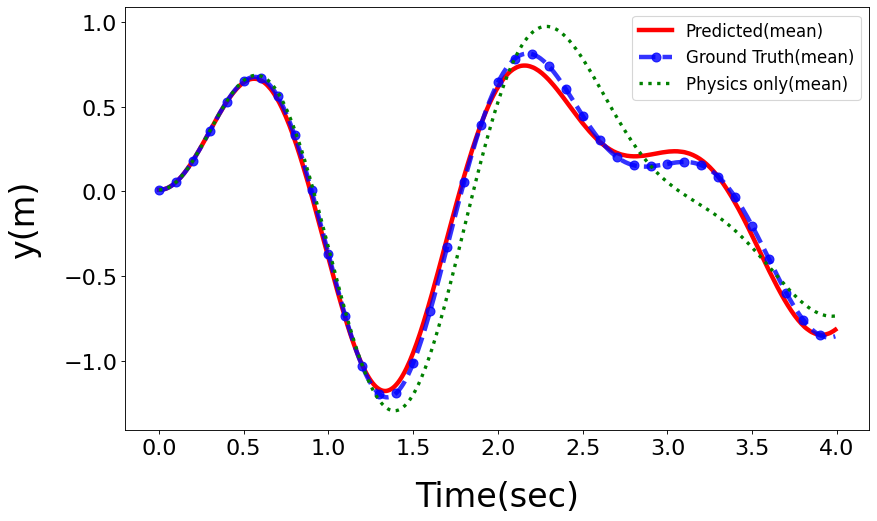

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure()
figure(figsize=(12, 7), dpi=80)

 #Define the confidence interval 
ci_x = 1.96* (cf_x_std/np.sqrt(500))

# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Mean")
# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Training samples:100")

# Plot the means
plt.plot(t, cf_x_mean, color='red',linewidth=4,label="Predicted(mean)")
plt.plot(t,cf_x_true_dis_mean, color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8, label="Ground Truth(mean)") #
plt.plot(t,cf_x_phy_dis_mean, 'g',linewidth = 3,linestyle=':',label="Physics only(mean)")

# plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
# plt.ylabel("$y_{1}$",fontsize = 30, labelpad=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2.0


# # Plot the confidence interval
plt.fill_between(t, (cf_x_mean-ci_x), (cf_x_mean+ci_x), color='blue', alpha=0.1)
plt.legend(loc='upper right',fontsize=15)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("y(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

<Figure size 432x288 with 0 Axes>

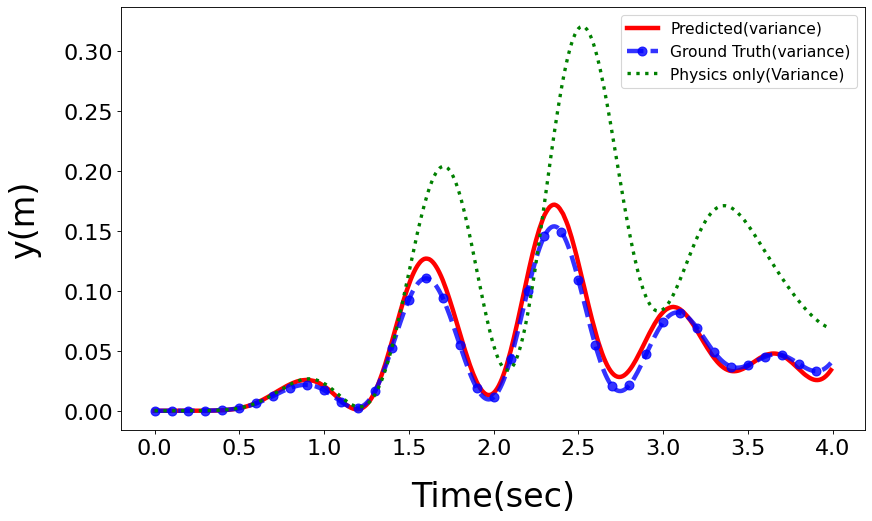

In [ ]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
#Plot the variance
#Plot the variance

#plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Training samples:100")
# plt.plot(t, cf_x_std, label="Prediction_variance",color='red', marker='o',linewidth =1 ,markersize=1)
# marker_on = np.arange(0,400,1)

# list1 = marker_on.tolist()


plt.plot(t, cf_x_std, color='red',linewidth =4 ,label="Predicted(variance)")
plt.plot(t,cf_x_true_dis_std,color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8,label="Ground Truth(variance)")
plt.plot(t,cf_x_phy_dis_std,color='green',linewidth = 3,linestyle=':',label="Physics only(Variance)")

plt.legend(loc='upper right',fontsize=14)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("y(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1.0
plt.show()

In [ ]:
# plt.plot(t,cf_x_true_dis_std,color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8,label="Ground Truth(variance)")
# plt.plot(t,cf_x_phy_dis_std,color='green',linewidth = 3,linestyle=':',label="Physics only(Variance)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

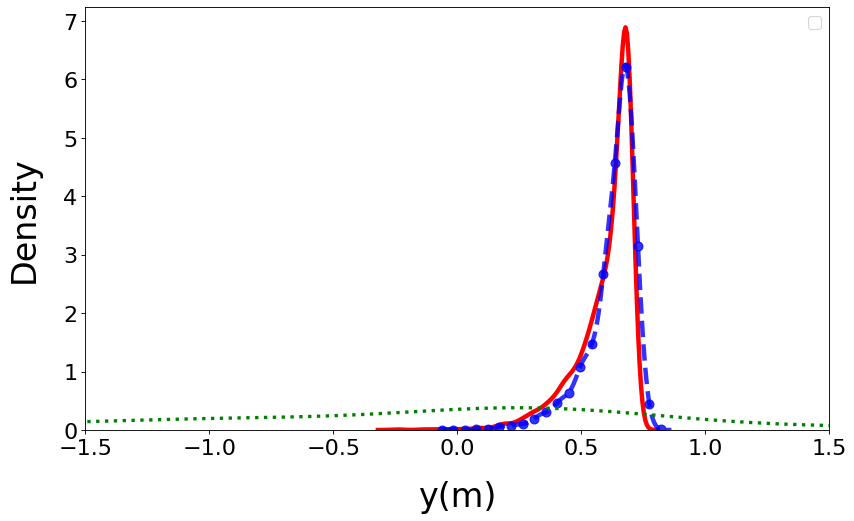

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(12, 7), dpi=80)
sns.distplot(a=cf_x[:,199], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis[:,199], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx_phy_only[:,199], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Training samples:100")
# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.xlim([-1.5, 1.5])
plt.legend(loc='upper right',fontsize=15)
plt.xlabel("y(m)",fontsize = 30, labelpad=20)
plt.ylabel("Density",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

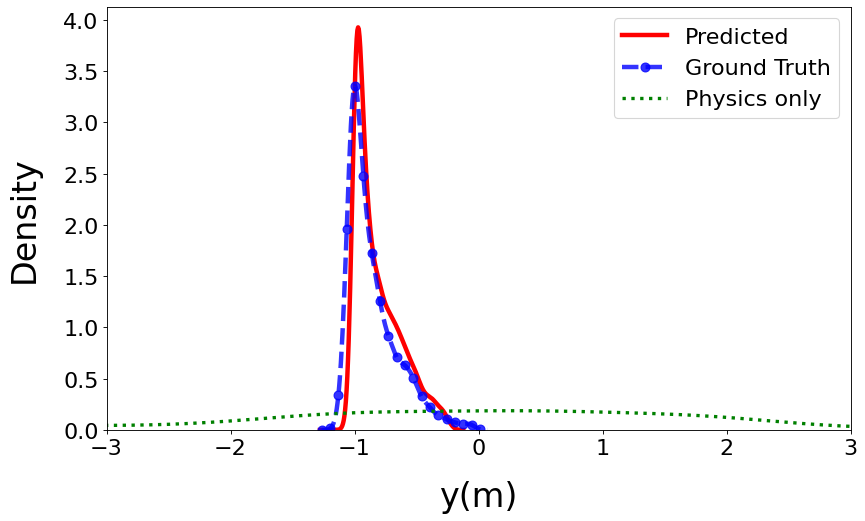

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(12, 7), dpi=80)
sns.distplot(a=cf_x[:,399], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4}, label = "Predicted")
sns.distplot(a=cf_x_true_dis[:,399], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8}, label= "Ground Truth")
sns.distplot(a=cfx_phy_only[:,399], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3}, label= "Physics only")
# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Training samples:100")
# plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.legend(loc='upper right',fontsize=20)
plt.xlabel("y(m)",fontsize = 30, labelpad=20)
plt.ylabel("Density",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1.0
plt.xlim([-3, 3])
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

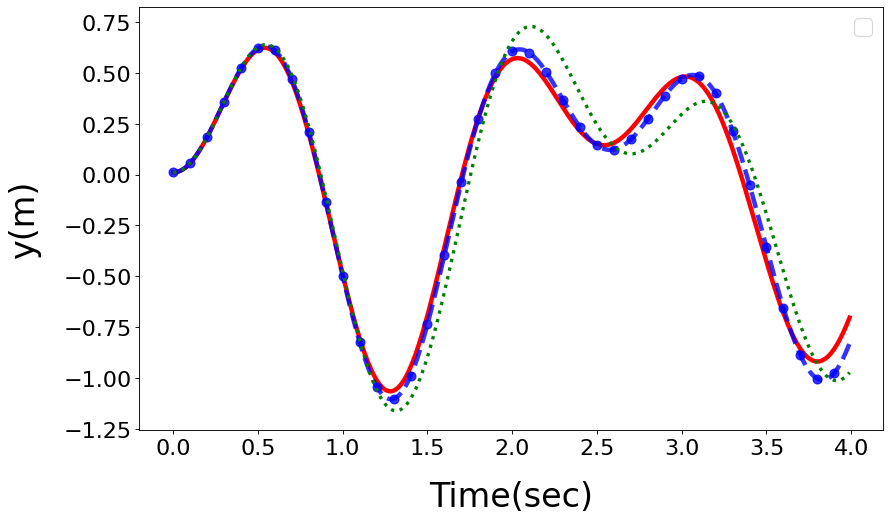

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(12, 7), dpi=80)

#plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Sample no.:500")
plt.plot(t,cf_x[999,:], 'r',linewidth=4)#,label="Prediction_displacement")
plt.plot(t,cf_x_true_dis[999,:], 'b',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#,label="True_displacement")
plt.plot(t,cfx_phy_only[:,999,0], linewidth = 3,linestyle=':',color='g')#,label="Phy_only_displacement")


    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=20)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("y(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

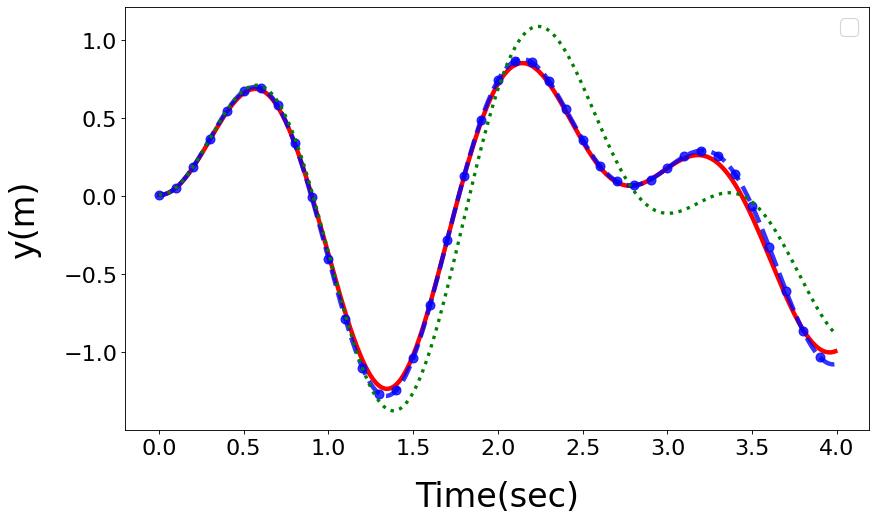

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(12, 7), dpi=80)

#plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Sample no.:500")
plt.plot(t,cf_x[1999,:], 'r',linewidth=4)#,label="Predicted")
plt.plot(t,cf_x_true_dis[1999,:], 'b',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#,label="Ground Truth")
plt.plot(t,cfx_phy_only[:,1999,0], linewidth = 3,linestyle=':',color='g')#,label="Physics only")

plt.legend(loc='upper right',fontsize=20)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("y(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

<Figure size 432x288 with 0 Axes>

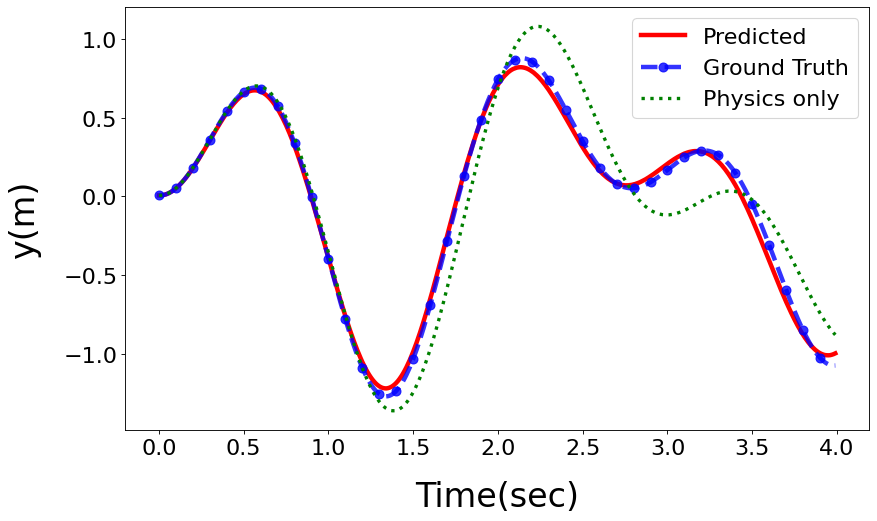

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(12, 7), dpi=80)

#plt.plot(t,cf_x_phy_dis_std,color='white',alpha=0.01,label="Sample no.:500")
plt.plot(t,cf_x[3999,:], 'r',linewidth=4,label="Predicted")
plt.plot(t,cf_x_true_dis[3999,:], 'b',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8,label="Ground Truth")
plt.plot(t,cfx_phy_only[:,3999,0], linewidth = 3,linestyle=':',color='g',label="Physics only")


plt.legend(loc='upper right',fontsize=20)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("y(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 1.0
plt.show()

**RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(cf_x_true_dis, cf_x)
rmse = math.sqrt(mse)
print(mse)

0.0045595031422498225


In [ ]:
err_100=np.empty((5000,400))
for i in range(5000):
    err_100[i,:] = ((cf_x_true_dis[i,:]- cf_x[i,:])**2)

In [ ]:
err_100.shape

(5000, 400)

In [ ]:
err_100_mean = np.empty((400))
for i in range(400):
    err_100_mean[i] = err_100[:,i].mean() 

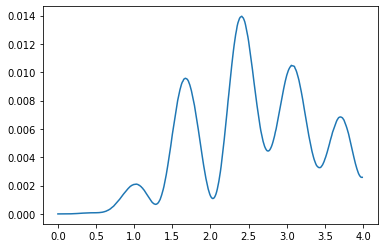

In [ ]:
plt.plot(t,err_100_mean)

**Accuracy**

In [ ]:
def save_error(name,data):
  np.save('MSE_{}.npy'.format(name),data)
  print("saved data")

In [ ]:
save_error(100,err_100_mean)

saved data


In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(cf_x_true_dis, cf_x), 2))

R2 score = 0.79
